# Data, Libraries & Settings

#### Libraries

In [1]:
# Data manipulation libs
import pandas as pd
import numpy as np
from tabulate import tabulate
import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Settings

In [2]:
# Plot settings
line_width = 0.75

# Print all columns from pandas df
pd.set_option('display.max_columns', None)

# Print all columns from pandas df
# pd.set_option('display.max_rows', None)

#### Subject Data

In [3]:
# Get subjects info
subjects_information_df = pd.read_csv('C:/Users/nuke2/Desktop/NW Work/Data/CDL Usecases/data_subjects_info.csv')
'''
Column  Attribute         [Unit]
Code:   subject ID        [1 to 24]
Weight: Weight of subject [Kg.]
Height: Weight of subject [Cm.]
Age:    Age of subject    [Years]
Gender: Gender of subject [0: F, 1: M]
'''
subjects_information_df.head(3)

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0


#### Test Data Description

The test data was collected during these 6 trials:
- Downstairs $\;$[dws]
- Upstairs   $\;$[ups]
- Walking    $\;$[wlk]
- Jogging    $\;$[jog]
- Sitting    $\;$[sit]
- Standing   $\;$[std]

# Data Loading

#### Define parameters for data importing

In [4]:
'''
Dictionary to specify file numbers of trials so all data can be loaded
'''
trial_id_dict = {
    'dws': [1, 2, 11],
    'ups': [3, 4, 12],
    'wlk': [7, 8, 15],
    'jog': [9, 16],
    'sit': [5, 13],
    'std': [6, 14]
}

'''
Get dictionary for all gyroscopic measurements
'''
measurement_dict = {
    'attitude': ['attitude.roll', 'attitude.pitch', 'attitude.yaw'],
    'gravity':  ['gravity.x', 'gravity.y', 'gravity.z'],
    'rotationRate': ['rotationRate.x', 'rotationRate.y', 'rotationRate.z'],
    'userAcceleration': ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']
}

'''
Specify number of subjects and list of subject numbers
*Assumes the subject ID's go from 1 to n incremented by 1*
'''
subject_number = 24
subject_id_lst = list(range(1, subject_number+1))
'''
Get folder location with cleaned test data
'''
test_data = 'C:/Users/nuke2/Desktop/NW Work/Data/CDL Usecases/df_all_data.csv'

#### Import Data

In [5]:
# Load cleaning data
df_all_data = pd.read_csv(test_data)

#### View Data

In [6]:
# View data
df_all_data.head()

,tick_num,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,test_type,subject_id,test_trial_number,time_since_start,time_series_data,attitude,gravity,rotationRate,userAcceleration,weight,height,age,gender
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws,1,1,0.00,2022-01-01 00:00:00.000,1.832682,1.0,1.370498,0.513360,102,188,46,1
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws,1,1,0.02,2022-01-01 00:00:00.020,1.818843,1.0,1.141648,0.250235,102,188,46,1
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws,1,1,0.04,2022-01-01 00:00:00.040,1.812205,1.0,0.372530,0.215450,102,188,46,1
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws,1,1,0.06,2022-01-01 00:00:00.060,1.803822,1.0,1.049628,0.166728,102,188,46,1
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws,1,1,0.08,2022-01-01 00:00:00.080,1.783334,1.0,0.921229,0.408720,102,188,46,1


# EDA

In [7]:
# Check for null values
null_checks = df_all_data.isnull().values.any()
if null_checks > 0:
    print("There are null values")
else:
    print("There are no null values")

There are no null values


#### Sample acceleration

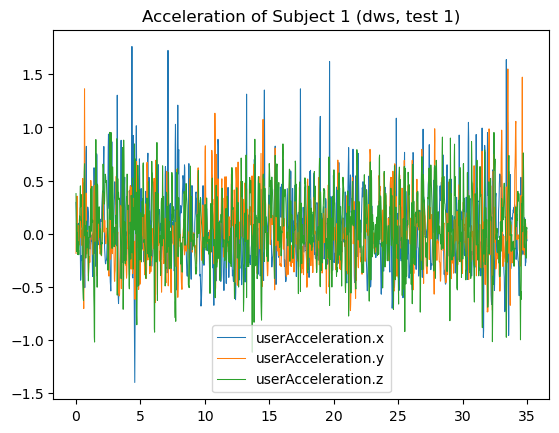

In [8]:
# Plot settings
line_width = 0.75

# Get data (subject 1, downstairs, trial 1)
dws_test1_user1 = df_all_data[df_all_data.test_type == 'dws']
dws_test1_user1 = dws_test1_user1[(dws_test1_user1['subject_id'] == 1) & (dws_test1_user1['test_trial_number'] == 1)]

x = dws_test1_user1['time_since_start']
y1 = dws_test1_user1['userAcceleration.x']
y2 = dws_test1_user1['userAcceleration.y']
y3 = dws_test1_user1['userAcceleration.z']

plt.plot(x, y1, label = "userAcceleration.x", linewidth=line_width)
plt.plot(x, y2, label = "userAcceleration.y", linewidth=line_width)
plt.plot(x, y3, label = "userAcceleration.z", linewidth=line_width)
plt.title("Acceleration of Subject 1 (dws, test 1)")
plt.legend(loc="best")
plt.show()

#### Sample statistics for all data

In [9]:
'''
Get min and max for each trial type in df_all_data
Store min and max in new dictionary
tabulate results of each trial type
'''
measures = measurement_dict.keys()
trial_types = trial_id_dict.keys()
min_max_data_dict = {}
for measurement in measures:
    min_max_data_dict[measurement] = {}
    for trial in trial_types:
        df_all_data[df_all_data.test_type == trial]
        temp_lst = list(df_all_data[df_all_data.test_type == trial][measurement])
        min_max_data_dict[measurement][trial] = (round(min(temp_lst), 5), round(max(temp_lst), 5), round(np.mean(temp_lst), 5))
    print(f'###################### Min/Max/Mean {measurement} ##########################')
    headers = ["Action Type", f"Min {measurement}", f"Max {measurement}", f"Mean {measurement}"]
    print(tabulate([(k,) + v for k,v in min_max_data_dict[measurement].items()], headers = headers))

###################### Min/Max/Mean attitude ##########################
Action Type      Min attitude    Max attitude    Mean attitude
-------------  --------------  --------------  ---------------
dws                   0.75927         4.64535          2.51448
ups                   0.29238         4.65211          2.55148
wlk                   0.54617         4.67095          2.24519
jog                   0.59719         4.68484          2.58972
sit                   0.00311         3.84029          1.52589
std                   1.2975          4.67603          2.7547
###################### Min/Max/Mean gravity ##########################
Action Type      Min gravity    Max gravity    Mean gravity
-------------  -------------  -------------  --------------
dws                  0.99997              1         1
ups                  0.99997              1         1
wlk                  0.99995              1         0.99999
jog                  0.99996              1         1
sit         

Does not seem to be any extreme values present (Lucky)

#### Acceleration of sit subjects

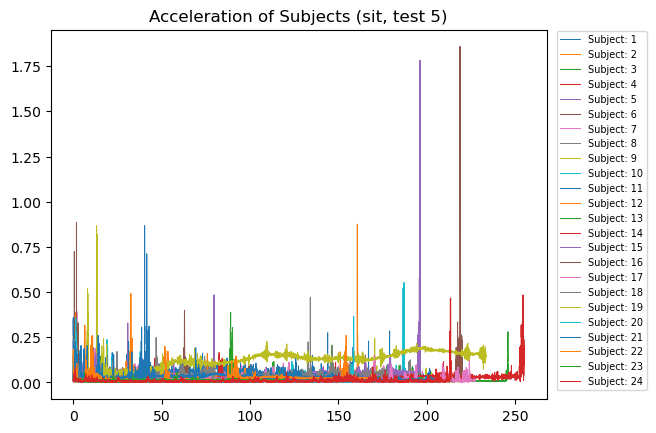

In [10]:
# Plot settings
fontsize = 7
line_width = 0.75
test_name = 'sit'
df_temp =  df_all_data[df_all_data.test_type == test_name]
df_temp[['subject_id', 'userAcceleration']]
temp_trial_number = list(df_temp['test_trial_number'].unique())[0]

for subject in range(1, subject_number+1):
    temp_df = df_temp[(df_temp['subject_id'] == subject) & (df_temp['test_trial_number'] == temp_trial_number)]
    
    x = temp_df['time_since_start']
    y = temp_df['userAcceleration']

    plt.plot(x, y, label = str(f"Subject: {subject}"), linewidth=line_width)
plt.title(f"Acceleration of Subjects ({test_name}, test {temp_trial_number})")
plt.legend(loc="best", fontsize=fontsize, bbox_to_anchor=(1.01, 1.01))
plt.show()

#### Acceleration of dws (downstairs) subjects

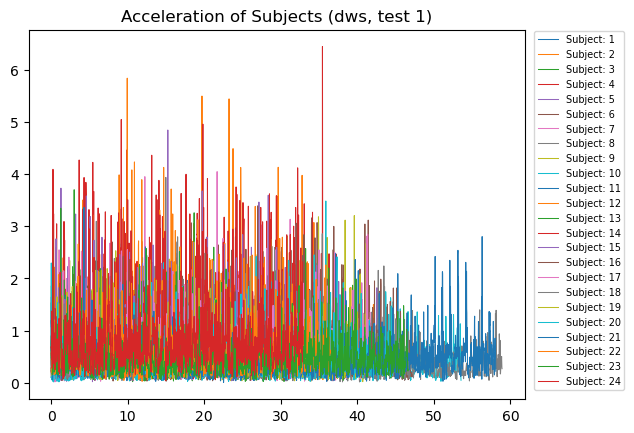

In [11]:
# Plot settings
fontsize = 7
line_width = 0.75
test_name = 'dws'
df_temp = df_all_data[df_all_data.test_type == test_name]
df_temp[['subject_id', 'userAcceleration']]
temp_trial_number = list(df_temp['test_trial_number'].unique())[0]

for subject in range(1, subject_number+1):
    temp_df = df_temp[(df_temp['subject_id'] == subject) & (df_temp['test_trial_number'] == temp_trial_number)]
    
    x = temp_df['time_since_start']
    y = temp_df['userAcceleration']

    plt.plot(x, y, label = str(f"Subject: {subject}"), linewidth=line_width)
plt.title(f"Acceleration of Subjects ({test_name}, test {temp_trial_number})")
plt.legend(loc="best", fontsize=fontsize, bbox_to_anchor=(1.01, 1.01))
plt.show()